# D600 Task 3 Principal Component Analysis 

In [3]:
# Import necessary librariess
import pandas as pd

# Load the Excel file
file_path = "D600 Task 3 Dataset 1 Housing Information.xlsx" 
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print("Dataset Loaded Successfully!")
print(df.head())

Dataset Loaded Successfully!
     ID        Price  SquareFootage  NumBathrooms  NumBedrooms  BackyardSpace  \
0  4922  255614.8992         566.62      1.000000            4         779.42   
1  5009  155586.0947        1472.34      1.000000            2         656.13   
2  4450  131050.8324         550.00      1.779354            3         754.57   
3  1070  151361.7125         941.81      2.035254            2         439.59   
4   400  113167.6128         550.00      1.064644            3         353.03   

   CrimeRate  SchoolRating  AgeOfHome  DistanceToCityCenter  ...  \
0      20.56          5.62      39.46                 10.08  ...   
1      15.62          5.63      40.51                  7.89  ...   
2      12.47          9.20      48.38                 23.74  ...   
3      22.22          7.08      94.67                  5.22  ...   
4       8.28          5.93      16.80                 43.13  ...   

   RenovationQuality  LocalAmenities  TransportAccess  Fireplace  HouseColo

In [4]:
from sklearn.preprocessing import StandardScaler

# Independent variables (exclude 'Price')
# Updated list of continuous variables (excluding NumBedrooms, Floors, and Windows)
continuous_vars = [
    'SquareFootage', 'NumBathrooms', 'BackyardSpace', 'CrimeRate',
    'SchoolRating', 'AgeOfHome', 'DistanceToCityCenter', 'EmploymentRate',
    'PropertyTaxRate', 'RenovationQuality', 'LocalAmenities', 'TransportAccess',
    'PreviousSalePrice'
]
X = df[continuous_vars]
y = df['Price']

# Standardize the independent variables
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized_df = pd.DataFrame(X_standardized, columns=continuous_vars)

# Save the cleaned dataset (standardized X and original y)
cleaned_dataset = pd.concat([X_standardized_df, y.reset_index(drop=True)], axis=1)
cleaned_dataset.to_csv('cleaned_datasetd599task3.csv', index=False)
print(cleaned_dataset.head())

   SquareFootage  NumBathrooms  BackyardSpace  CrimeRate  SchoolRating  \
0      -1.132277     -1.187828       0.957151  -0.591776     -0.700696   
1       0.993926     -1.187828       0.516683  -0.865854     -0.695399   
2      -1.171293     -0.369602       0.868372  -1.040621      1.195478   
3      -0.251508     -0.100938      -0.256932  -0.499677      0.072604   
4      -1.171293     -1.119960      -0.566178  -1.273088     -0.536502   

   AgeOfHome  DistanceToCityCenter  EmploymentRate  PropertyTaxRate  \
0  -0.230889             -0.615042        0.794367         0.681094   
1  -0.197846             -0.797175       -0.109066        -1.104064   
2   0.049814              0.521008        0.641205         0.741268   
3   1.506508             -1.019229       -0.501960        -0.101167   
4  -0.943973              2.133599       -1.600730        -0.482268   

   RenovationQuality  LocalAmenities  TransportAccess  PreviousSalePrice  \
0          -0.037232       -0.562349        -0.73387

In [5]:
# Descriptive statistics for all independent variables
descriptive_stats = df[continuous_vars].describe().T
descriptive_stats['range'] = descriptive_stats['max'] - descriptive_stats['min']
print("Descriptive Statistics for All Independent Variables:")
print(descriptive_stats)

# Mode for each variable
modes = df[continuous_vars].mode().iloc[0]
print("\nMode for All Independent Variables:")
print(modes)

# Descriptive statistics for the dependent variable (Price)
print("\nDescriptive Statistics for Dependent Variable (Price):")
print(df['Price'].describe())
print("Mode for Price:", df['Price'].mode().iloc[0])


Descriptive Statistics for All Independent Variables:
                       count           mean            std          min  \
SquareFootage         7000.0    1048.947459     426.010482   550.000000   
NumBathrooms          7000.0       2.131397       0.952561     1.000000   
BackyardSpace         7000.0     511.507029     279.926549     0.390000   
CrimeRate             7000.0      31.226194      18.025327     0.030000   
SchoolRating          7000.0       6.942923       1.888148     0.220000   
AgeOfHome             7000.0      46.797046      31.779701     0.010000   
DistanceToCityCenter  7000.0      17.475337      12.024985     0.000000   
EmploymentRate        7000.0      93.711349       4.505359    72.050000   
PropertyTaxRate       7000.0       1.500437       0.498591     0.010000   
RenovationQuality     7000.0       5.003357       1.970428     0.010000   
LocalAmenities        7000.0       5.934579       2.657930     0.000000   
TransportAccess       7000.0       5.983860   

In [6]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_standardized_df)
pca_columns = [f'PC{i+1}' for i in range(X_standardized_df.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# Show the principal component loadings (matrix)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=pca_columns,
    index=continuous_vars
)
print("Principal Component Loadings (Matrix):")
print(loadings)

Principal Component Loadings (Matrix):
                           PC1       PC2       PC3       PC4       PC5  \
SquareFootage         0.355053 -0.192905  0.243117  0.068597  0.011815   
NumBathrooms          0.306842 -0.206168  0.231782  0.029927  0.078356   
BackyardSpace         0.103614  0.011389 -0.099095 -0.089521  0.967412   
CrimeRate            -0.121532 -0.024764  0.596005  0.004683  0.059147   
SchoolRating          0.384345 -0.087609 -0.228961  0.153557 -0.153734   
AgeOfHome            -0.152288 -0.068004  0.156310  0.604301  0.106024   
DistanceToCityCenter -0.211674  0.039570  0.065883  0.493164  0.126068   
EmploymentRate        0.139473  0.008550 -0.582676  0.354862  0.016240   
PropertyTaxRate      -0.156649  0.060134  0.148363  0.419589 -0.037351   
RenovationQuality     0.431320 -0.068575 -0.002215  0.218630 -0.038417   
LocalAmenities        0.213736  0.658439  0.106656  0.037748 -0.008392   
TransportAccess       0.216714  0.655512  0.104244  0.038288 -0.001334   

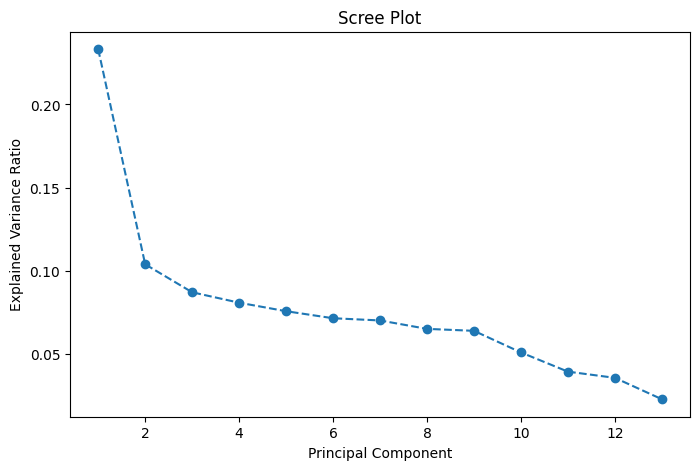

In [7]:
import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [8]:
# Variance of each principal component
variance = pca.explained_variance_
print("Variance of Each Principal Component:")
print(variance)

Variance of Each Principal Component:
[3.03147517 1.35072947 1.13224388 1.05071455 0.98422855 0.9293119
 0.91196049 0.84624217 0.83090577 0.66206516 0.51195829 0.46356013
 0.29646189]


In [9]:
# Cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative Explained Variance:")
print(cumulative_variance)

Cumulative Explained Variance:
[0.23315709 0.33704451 0.42412775 0.5049404  0.58063947 0.65211479
 0.72225558 0.78734183 0.85124853 0.90216934 0.94154512 0.9771985
 1.        ]


In [16]:
from sklearn.model_selection import train_test_split

n_components = 2  # Use 2 PCs
X_reduced = X_pca_df.iloc[:, :n_components]
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Save the datasets
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Training and test datasets created.")

Training and test datasets created.


In [17]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()
print(model.summary())

# Backward elimination (optional, if needed)
while True:
    p_values = model.pvalues
    max_p_value = p_values.max()
    if max_p_value > 0.05:
        excluded_feature = p_values.idxmax()
        X_train_const = X_train_const.drop(columns=[excluded_feature])
        model = sm.OLS(y_train, X_train_const).fit()
    else:
        break

print("Optimized Model Summary:")
print(model.summary())
print("\nP-values of Independent Variables in the Optimized Model:")
print(model.pvalues)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     3541.
Date:                Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                        00:09:19   Log-Likelihood:                -72448.
No. Observations:                5600   AIC:                         1.449e+05
Df Residuals:                    5597   BIC:                         1.449e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.082e+05   1343.759    229.386      0.0

In [18]:
from sklearn.metrics import mean_squared_error

y_train_pred = model.predict(X_train_const)
mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) on Training Set:", mse_train)

Mean Squared Error (MSE) on Training Set: 10105682221.136793


In [19]:
# Prepare test set with same columns as training set
X_test_const = sm.add_constant(X_test)
X_test_const = X_test_const[X_train_const.columns]

y_test_pred = model.predict(X_test_const)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) on Test Set:", mse_test)

Mean Squared Error (MSE) on Test Set: 9526684965.121933


In [20]:
# Extract the coefficients and intercept from the optimized model
coefficients = model.params

# Format the regression equation
regression_equation = "Price = "
for i, (feature, coef) in enumerate(coefficients.items()):
    if i == 0:  # Intercept
        regression_equation += f"{coef:.2f} "
    else:
        regression_equation += f"+ ({coef:.2f} * {feature}) "

# Print the regression equation
print("Regression Equation:")
print(regression_equation)

Regression Equation:
Price = 308239.06 + (62451.51 * PC1) + (-24902.14 * PC2) 
